In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn
import scipy
import mne
import os
import pandas as pd
import numpy as np
import mne
import scipy
import pickle
import multiprocessing

In [2]:
PATH_OUT = "C:\\Users\\ICN_admin\\Dropbox (Brain Modulation Lab)\\Shared Lab Folders\\CRCNS\\MOVEMENT DATA\\SharpWaveAnalysis\\"

In [4]:
os.path.exists(PATH_OUT)

True

In [5]:
from itertools import repeat

In [7]:
m = 5
iterable = zip(repeat(m), range(1, m+1))

In [9]:
list(iterable)

[(5, 1), (5, 2), (5, 3), (5, 4), (5, 5)]

In [10]:
with open(os.path.join(PATH_OUT, "sub_003_ch_ECOG_RIGHT_5.p"), "rb") as handle:
    df = pickle.load(handle)

In [11]:
df

,MOV_TYPE,decay_steepness,decay_time,interval,label,peak_idx_left,peak_idx_right,peak_left,peak_right,prominence,rise_steepness,rise_time,sharpness,slope_ratio,trough,trough_idx,width,y_contra,y_ipsi
0,NO_MOV,2.049685,-17.0,0.0,1.0,11.0,31.0,47.687427,-38.996160,48.375093,-0.029619,3.0,-12.577063,-2.079304,-44.029460,28.0,20.0,0.0,0.0
1,NO_MOV,9.626303,-19.0,22.0,1.0,31.0,68.0,-38.996160,-11.737752,110.218456,-0.028450,18.0,-30.232448,-9.654753,-135.585412,50.0,37.0,0.0,0.0
2,NO_MOV,5.426813,-9.0,27.0,1.0,68.0,88.0,-11.737752,-4.492921,30.606835,-0.528666,11.0,-16.984717,-5.955478,-38.722171,77.0,20.0,0.0,0.0
3,NO_MOV,1.168215,-2.0,13.0,1.0,88.0,96.0,-4.492921,-0.888800,2.314962,-0.250567,6.0,-0.482583,-1.418782,-5.005822,90.0,8.0,0.0,0.0
4,NO_MOV,7.028597,-13.0,19.0,1.0,96.0,132.0,-0.888800,57.149813,64.073390,-0.505639,23.0,-7.347416,-7.534236,-35.942883,109.0,36.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20710,NO_MOV,6.499676,-24.0,45.0,1.0,665853.0,665905.0,15.569946,32.416773,81.914909,-0.326372,28.0,-19.347375,-6.826048,-57.921550,665877.0,52.0,0.0,0.0
20711,NO_MOV,0.161610,-2.0,30.0,1.0,665905.0,665910.0,32.416773,32.428796,0.205660,-0.082305,3.0,2.496659,-0.243915,32.217125,665907.0,5.0,0.0,0.0
20712,NO_MOV,13.600079,-21.0,24.0,1.0,665910.0,665949.0,32.428796,-27.327238,173.473343,-0.632252,18.0,-44.724130,-14.232330,-170.922564,665931.0,39.0,0.0,0.0
20713,NO_MOV,5.666972,-2.0,20.0,1.0,665949.0,665959.0,-27.327238,-0.620518,13.855524,-0.168347,8.0,-4.750267,-5.835319,-27.829402,665951.0,10.0,0.0,0.0


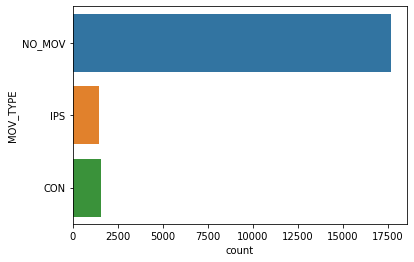

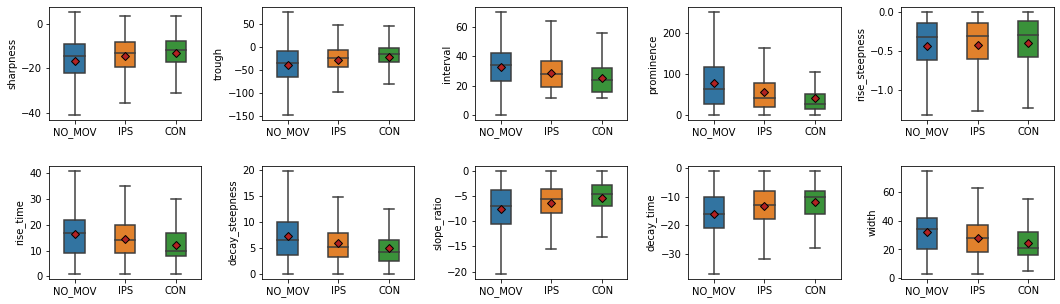

In [12]:
sn.countplot(y="MOV_TYPE", data = df)
plt.show()


fig = plt.figure(figsize=(18,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')

for i, measure in enumerate(["sharpness", "trough", "interval", "prominence", "rise_steepness", "rise_time", \
          "decay_steepness", "slope_ratio", "decay_time", "width"]):
    ax = fig.add_subplot(2, 5, i+1)
    sn.boxplot(x="MOV_TYPE", y=measure, data=df, ax=ax, showmeans=True, width=0.4, showfliers=False, 
              meanprops=meanpointprops)
    plt.xlabel('')
plt.show()

In [13]:
def plot_mov_sep_hist(metric, label):
    sn.distplot(df[df.MOV_TYPE.str.contains("NO_MOV")][metric], label='None', color='black')
    sn.distplot(df[df.MOV_TYPE.str.contains("CON")][metric], label='CON', color='red')
    sn.distplot(df[df.MOV_TYPE.str.contains("IPS")][metric], label='IPS', color='blue')
    plt.title(metric)
    plt.xlabel(metric + " [" + label+"]")
    plt.legend()

In [14]:
dict_metrics = {"sharpness":"mV", 
                "trough":"mV",
                "interval":"ms",
                "prominence":"mV",
                "rise_steepness":"mV'",
                "rise_time":"ms", 
                "decay_steepness":"mV'",
                "slope_ratio":"mV'",
                "decay_time":"ms",
                "width":"ms"}

In [15]:
def plot_hist_comp(metric, metric_unit):
    p = np.array(df[df.MOV_TYPE.str.contains("NO_MOV")][metric])
    q_con = np.array(df[df.MOV_TYPE.str.contains("CON")][metric])
    q_ips = np.array(df[df.MOV_TYPE.str.contains("IPS")][metric])

    range_ = [np.min(np.concatenate([q_con, q_ips, p])), np.max(np.concatenate([q_con, q_ips, p]))]
    p_, x, _ = plt.hist(p, density=True, bins=50, range=range_, alpha=0.3, color="black")
    q_con_ = plt.hist(q_con, density=True, bins=50, range=range_, alpha=0.3, color="r")[0]
    # for Dkl replace zero elements with e-9
    Dkl_con = np.round(scipy.stats.entropy(np.where(p_ == 0.0, 1e-9, p_), np.where(q_con_ == 0.0, 1e-9, q_con_)), 2)
    
    # adapt this measure 
    
    q_ips_ = plt.hist(q_ips, density=True, bins=50, range=range_, alpha=0.3, color="b")[0]
    Dkl_ips = np.round(scipy.stats.entropy(np.where(p_ == 0.0, 1e-9, p_), np.where(q_ips_ == 0.0, 1e-9, q_ips_)), 2)


    density_p = scipy.stats.gaussian_kde(p)
    density_q_con = scipy.stats.gaussian_kde(q_con)
    density_q_ips = scipy.stats.gaussian_kde(q_ips)
    plt.plot(x, density_p(x), c="black", label='NO_MOV')
    plt.plot(x, density_q_con(x), c="r", label='CON')
    plt.plot(x, density_q_ips(x), c="b", label='IPS')
    plt.legend()

    plt.title("Dkl_con = " + str(Dkl_con)+ "\nDkl_ips = "+ str(Dkl_ips))
    plt.xlabel(metric + " ["+ metric_unit+"]")
    return Dkl_con, Dkl_ips

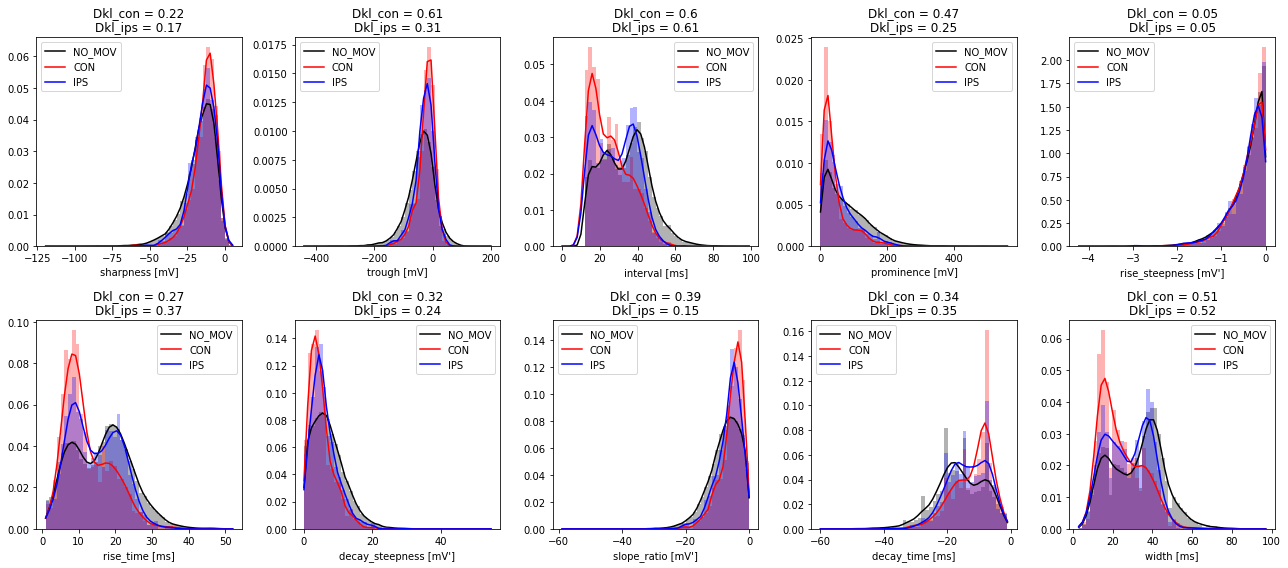

In [16]:
fig = plt.figure(figsize=(18,8))
for idx, metric in enumerate(dict_metrics.items()):
    plt.subplot(2, 5, idx+1)
    plot_hist_comp(metric[0], metric[1])
plt.tight_layout()

In [ ]:
# post analysis: get mean of all distributions 
# calculate sharpness ratio: 
but analysis for peaks had been missing right now 

In [20]:
subject_id = "000"
waveform_analyzer = Waveform_analyzer(sample_rate=1000, line_noise=60)
with open(os.path.join(COMB_RUNS_PATH, "sub_"+subject_id+"_comb.p"), "rb") as handle:
    dat = pickle.load(handle)



No data specified. Sanity checks related to the length of the signal relative to the filter order will be skipped.
Setting up band-pass filter from 5 - 90 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 2.50 Hz)
- Upper passband edge: 90.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 92.50 Hz)
- Filter length: 1001 samples (1.001 sec)



In [25]:
ch = list(dat.keys())[0]

In [26]:
ch

'ECOG_RIGHT_0'

In [27]:
df = waveform_analyzer.analyze_waveform(dat[ch]["data"], peak_dist=1, trough_dist=12,
                    label=True, y_contra=dat[ch]["mov_con"], y_ipsi=dat[ch]["mov_con"], plot_=False)

No valid trough
No valid trough


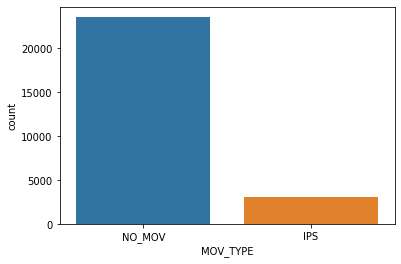

In [28]:
sn.countplot(df["MOV_TYPE"])

In [ ]:
for ch in dat.keys():
    df = waveform_analyzer.analyze_waveform(dat[ch]["data"], peak_dist=1, trough_dist=12,
                    label=True, y_contra=dat[ch]["mov_con"], y_ipsi=dat[ch]["mov_con"], plot_=False)

    df.to_pickle(PATH_OUT + "sub_"+subject_id+"_ch_"+ch+".p")